# <img src="images.png">

# Data Description-
Santander's competition is about predicting which clients are going to make a transfer in the future. The available dataset is split between train and test, with 200,000 clients in each . There are 200 variables available (0, 199), but no information about them is given other than the numbers they hold.

we are asked to predict if a customer will make a transaction or not regardless of the amount of money transacted. Hence it is binary classification problem. In the data,the features given are numeric and anonymized.
0 indicate person doesn't make the transfer.
1 denotes person make the transfer.

# Performance metric used-
1-AUC

# Loading of dataset

In [0]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV
import lightgbm as lgb

In [0]:
#load the data
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")


In [9]:
#columns in data
print("columns are:-",train_df.columns)

columns are:- Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)


In [10]:
#shape of data
print("train shape-",train_df.shape)
print("test shape",test_df.shape)

train shape- (200000, 202)
test shape (200000, 201)


In [0]:
#head
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


# EDA

In [0]:
#description of data
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

In [0]:
#description of data
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,0.371335,-3.268551,14.022662,8.540872,7.532703,14.573704,9.321669,-5.70445,15.265776,12.456675,13.298428,17.230598,4.299010,3.019707,10.567479,13.666970,-3.983721,-1.129536,5.530656,5.047247,-7.687695,10.404920,-0.524830,14.762686,11.434861,3.870130,2.213288,5.875048,10.647806,0.672667,...,24.146181,5.635300,5.360975,11.026376,-2.857328,19.320760,2.962821,-4.189133,4.930356,5.633716,-0.020824,-0.805148,19.779528,-0.666240,20.264135,11.635715,-2.776134,11.864538,-0.949318,2.582604,-2.722636,10.080827,0.651432,8.768929,12.719302,-3.963045,8.978800,-10.291919,15.366094,0.755673,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,5.508661,5.961443,0.190071,4.628712,2.255257,0.411592,2.544860,6.74646,7.846983,7.989812,5.884245,8.199877,2.844023,0.527951,3.771047,0.285454,5.945853,1.524765,0.785618,2.610078,7.971581,2.156324,2.588700,4.325727,0.541040,5.170614,3.120685,2.257235,4.260820,4.078592,...,10.876184,0.217936,1.426064,5.268894,5.457937,5.039303,0.370668,7.827428,3.086443,0.365750,4.417876,5.378492,8.678024,5.987419,7.141816,2.884821,7.557001,2.626556,8.570314,2.803890,5.225554,1.369546,8.961936,4.464461,9.316889,4.724641,3.206635,11.562352,3.929227,0.976123,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,-22.672400,-25.811800,13.424500,-4.741300,0.670300,13.203400,0.314300,-28.90690,-11.324200,-12.699400,-2.634600,-9.940600,-5.164000,1.390600,-0.731300,12.749600,-24.536100,-6.040900,2.842500,-4.421500,-34.054800,1.309200,-8.209000,1.691100,9.776400,-16.923800,-10.466800,-0.885100,-5.368300,-14.083700,...,-8.925700,4.910600,0.106200,-6.093700,-21.514000,3.667300,1.813100,-37.176400,-5.405700,4.291500,-15.593200,-20.393600,-11.796600,-21.342800,-2.485400,2.951200,-29.838400,5.025300,-29.118500,-7.767400,-20.610600,5.346000,-28.092800,-5.476800,-17.011400,-22.467000,-2.303800,-47.306400,4.429100,-2.511500,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.91190

mean values are distributed over the large range.

---


std dev for some features are high.

In [0]:
#checking for null entries in train 
train_df.isnull().any().any()

False

In [0]:
#checking for null entries in train 
test_df.isnull().any().any()

False

there is no missing value in train & test

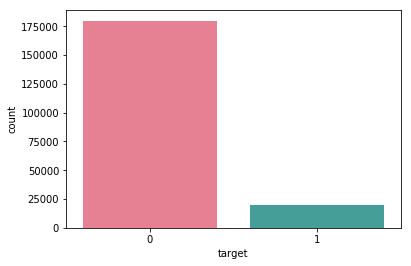

In [0]:
#class imbalance
sns.countplot(x='target',data=train_df,palette="husl")

In [0]:
train_df['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [0]:
print("percent of class 1 data points is", 100 * train_df["target"].value_counts()[1]/train_df.shape[0],'%')
print("percent of class 0 data points is", 100 * train_df["target"].value_counts()[0]/train_df.shape[0],'%')

percent of class 1 data points is 10.049 %
percent of class 0 data points is 89.951 %


highly imbalanced data

In [0]:
#number of unique value in each features in train
for col in train_df.columns[2:]:
    print("Number of unique values of {} : {}".format(col, train_df[col].nunique()))

Number of unique values of var_0 : 94672
Number of unique values of var_1 : 108932
Number of unique values of var_2 : 86555
Number of unique values of var_3 : 74597
Number of unique values of var_4 : 63515
Number of unique values of var_5 : 141029
Number of unique values of var_6 : 38599
Number of unique values of var_7 : 103063
Number of unique values of var_8 : 98617
Number of unique values of var_9 : 49417
Number of unique values of var_10 : 128764
Number of unique values of var_11 : 130193
Number of unique values of var_12 : 9561
Number of unique values of var_13 : 115181
Number of unique values of var_14 : 79122
Number of unique values of var_15 : 19810
Number of unique values of var_16 : 86918
Number of unique values of var_17 : 137823
Number of unique values of var_18 : 139515
Number of unique values of var_19 : 144180
Number of unique values of var_20 : 127764
Number of unique values of var_21 : 140062
Number of unique values of var_22 : 90660
Number of unique values of var_23 

Most features have more than thousands of values for each variable except var_68.
so var_68 may be categorical feature.

let's see the distribution of var_68

In [0]:
#seperating target 0 & target 1 data
t0=train_df[train_df['target']==0]
t1=train_df[train_df['target']==1]

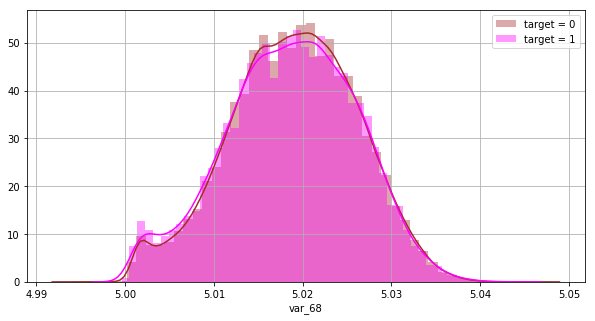

In [0]:
#distribution of var_68
plt.figure(figsize=(10,5))
sns.distplot(t0['var_68'],color="brown", label='target = 0')
sns.distplot(t1['var_68'],color="magenta",label='target = 1')
plt.legend()
plt.grid()
plt.show()

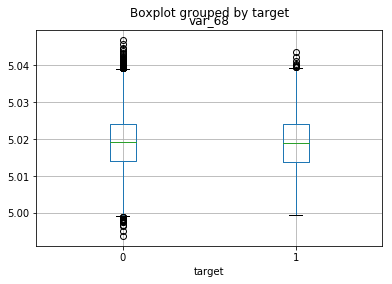

In [0]:
#violin plot 
train_df.boxplot('var_68',by='target')

dist. is mostly overlapping for both the class.

In [11]:
#number of unique value in each features in test
for col in test_df.columns[2:]:
    print("Number of unique values of {} : {}".format(col, test_df[col].nunique()))

Number of unique values of var_1 : 71661
Number of unique values of var_2 : 61865
Number of unique values of var_3 : 56507
Number of unique values of var_4 : 49995
Number of unique values of var_5 : 83228
Number of unique values of var_6 : 33273
Number of unique values of var_7 : 69487
Number of unique values of var_8 : 67521
Number of unique values of var_9 : 41583
Number of unique values of var_10 : 79221
Number of unique values of var_11 : 79749
Number of unique values of var_12 : 9121
Number of unique values of var_13 : 74037
Number of unique values of var_14 : 58951
Number of unique values of var_15 : 18253
Number of unique values of var_16 : 61906
Number of unique values of var_17 : 82518
Number of unique values of var_18 : 82682
Number of unique values of var_19 : 84370
Number of unique values of var_20 : 78645
Number of unique values of var_21 : 82738
Number of unique values of var_22 : 63855
Number of unique values of var_23 : 22619
Number of unique values of var_24 : 70202
Nu

here also var_68 has less unique value.

In [12]:
#checking correlation
cor=train_df.corr()
cor.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-0.069489,-0.055156,-0.006332,0.017283,0.008117,0.000864,0.043479,0.011291,-0.018329,-0.058483,0.060558,-0.025473,0.028477,0.013328,0.062422,-0.000582,-0.023942,0.004682,0.000638,-0.025619,0.030513,-0.044334,-0.052692,0.036567,-0.038397,0.007685,0.000970,...,-0.005135,0.004168,0.032647,0.031811,0.040997,-0.055734,-0.057773,0.030797,0.014115,-0.048382,0.047973,0.014873,-0.037976,0.042022,-0.061669,0.021692,0.007469,-0.036863,-0.019681,0.050002,0.031190,0.013714,-0.007198,-0.005467,0.048315,0.000053,-0.030421,0.014873,-0.034015,0.009212,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,...,-0.002975,-0.004248,0.000719,0.000320,-0.000132,-0.002302,-0.007269,0.002156,0.001848,-0.004478,0.002574,0.001678,-0.005587,0.002499,-0.000683,-0.000546,0.001197,0.000953,0.001165,0.003447,0.001939,0.001952,-0.001957,-0.001721,-0.000554,0.001868,0.001267,0.001413,0.001770,0.000543,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002481,-0.001180,0.000289,0.001246,-0.002255,-0.001519,0.001762,0.003606,0.001417,0.000844,0.004778,-0.004551,-0.002463,0.006328,-0.002244,-0.002811,0.002713,0.001072,-0.002965,0.004293,-0.004466,-0.000122,0.001545,...,0.000223,-0.000245,-0.001470,0.002911,0.003409,0.002436,-0.006578,-0.004629,0.001956,-0.002523,0.001036,0.004399,-0.002802,0.002784,-0.004758,0.001693,-0.001331,0.002266,-0.002005,0.000883,0.003376,0.000008,0.001516,0.001055,-0.000248,0.002600,0.002227,-0.000236,-0.002185,0.005840,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,-0.000474,0.005180,-0.003781,-0.008795,-0.002627,0.004063,0.000102,0.000841,0.003529,0.001643,0.002162,-0.006885,0.000297,0.002280,0.001693,-0.000913,0.006138,0.000224,-0.000424,0.000480,0.002209,-0.002581,0.005500,0.001293,-0.004599,0.005809,0.002875,-0.001025,-0.000735,...,0.000551,0.003607,0.005942,-0.000706,0.000467,-0.003284,-0.006253,0.000237,0.003340,-0.003999,0.003445,-0.000273,0.001126,0.000710,-0.006836,-0.001028,0.000362,-0.004572,-0.003408,0.001823,0.002365,-0.002341,-0.001202,0.002198,0.003259,0.003372,-0.001282,0.002799,0.000008,0.002448,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,-0.000897,0.000482,-0.001794,-0.005717,0.000534,0.003093,0.003011,0.003618,0.000995,-0.000481,0.003385,-0.000037,-0.002905,0.001633,-0.002006,-0.002307,0.001946,-0.001970,-0.003186,0.001003,0.004797,0.001658,0.001703,-0.001879,-0.002028,0.000071,-0.

In [0]:
corr=abs(cor['target']).sort_values(ascending=False)
print('top 10 correlated features wrt target-:', corr[:10])

top 10 correlated features wrt target-: target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
Name: target, dtype: float64


Distributions of 1st 28 features


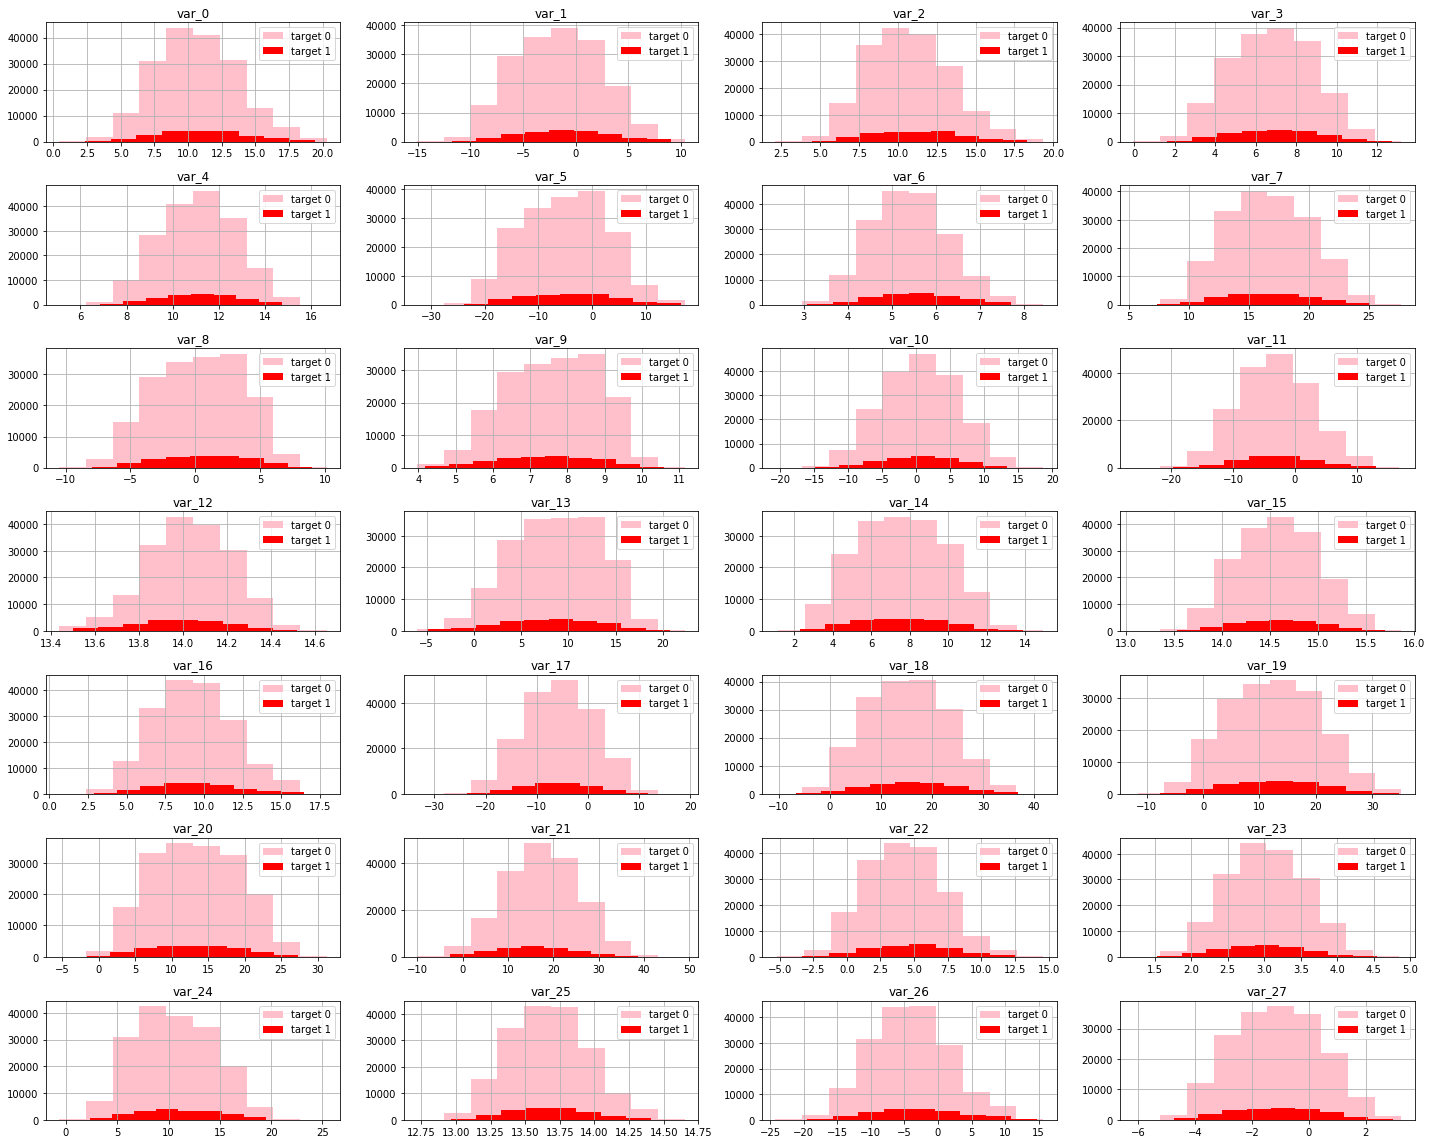

In [0]:
print('Distributions of 1st 28 features')
plt.figure(figsize=(20,16))
for i, col in enumerate(list(train_df.columns)[2:30]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='pink')
    plt.hist(t1[col],label='target 1',color='r')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

Distributions of next 28 features


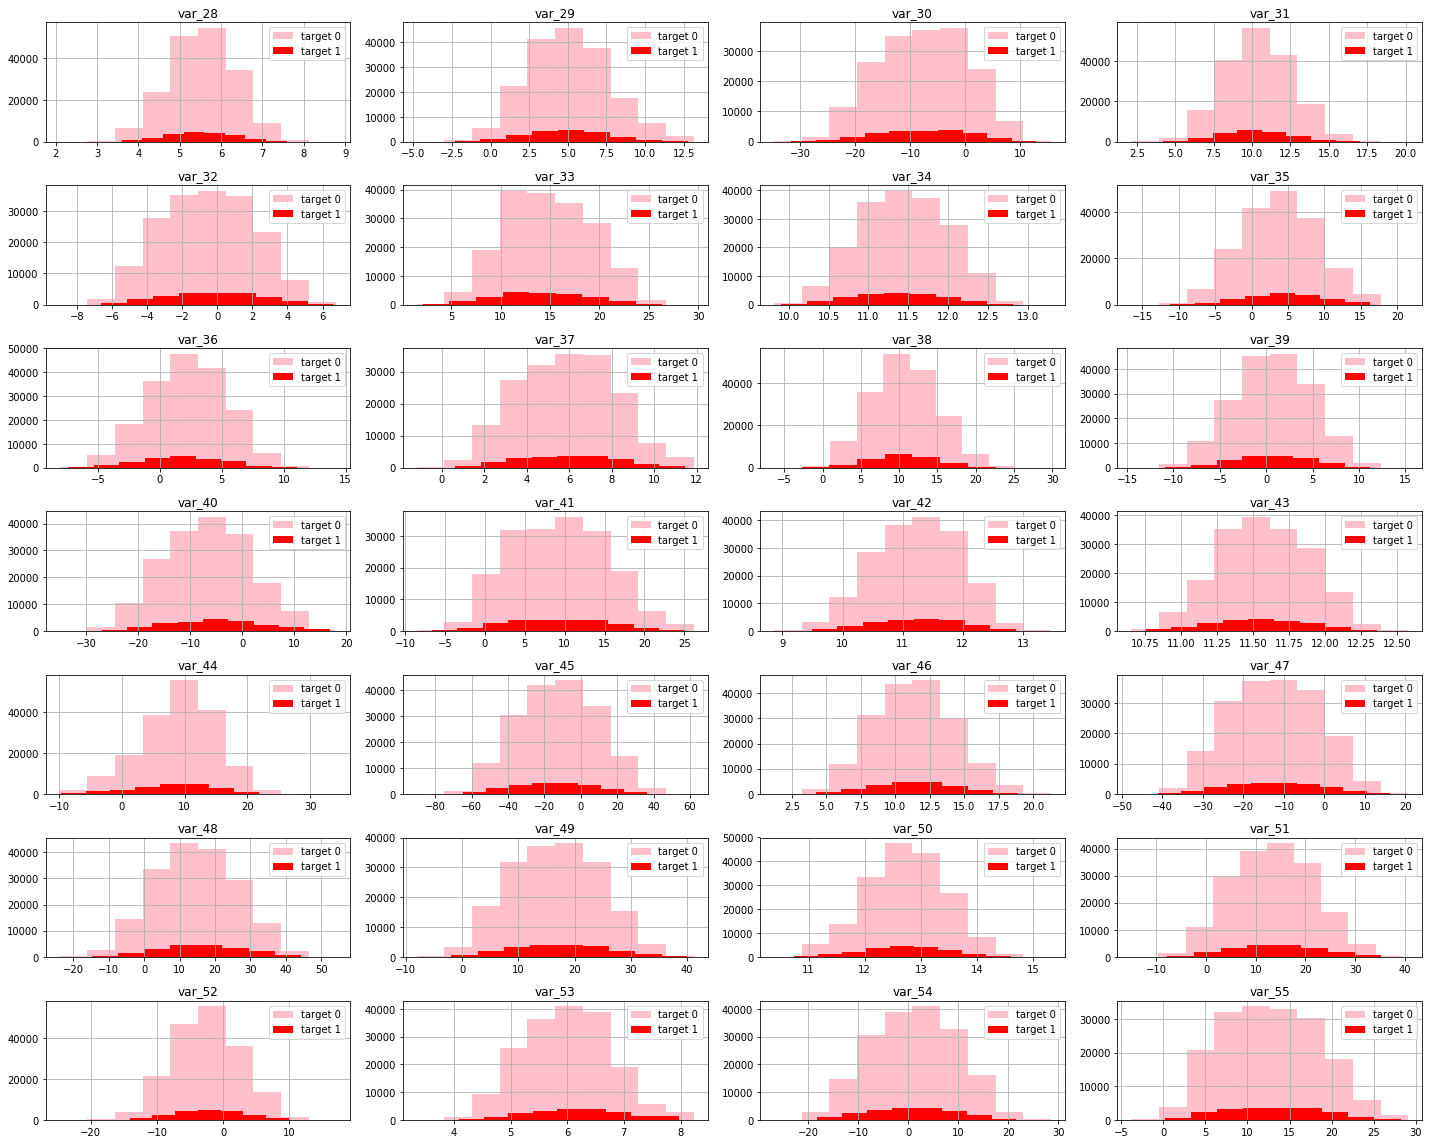

In [0]:
print('Distributions of next 28 features')
plt.figure(figsize=(20,16))
for i,col in enumerate(list(train_df.columns)[30:58]):
    plt.subplot(7, 4,i + 1)
    plt.hist(t0[col],label='target 0',color='pink')
    plt.hist(t1[col],label='target 1',color='r')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

there is no significant difference in values between the "transaction done" and "transaction not done".

**Distribution of some common fetaures in test & train data**

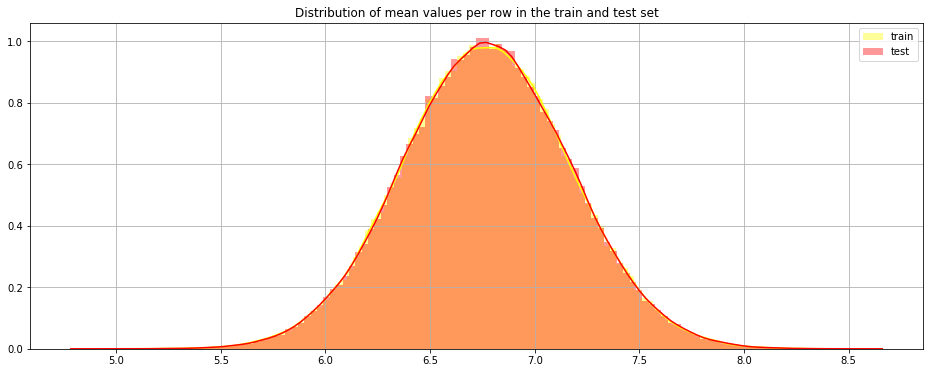

In [0]:
plt.figure(figsize=(16,6))
feat= train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[feat].mean(axis=1),color="yellow", kde=True,bins=120, label='train')
sns.distplot(test_df[feat].mean(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

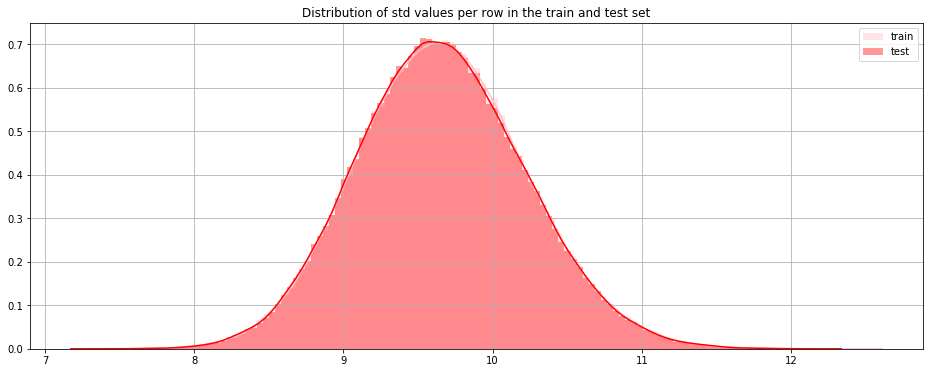

In [0]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_df[feat].std(axis=1),color="pink", kde=True,bins=120, label='train')
sns.distplot(test_df[feat].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

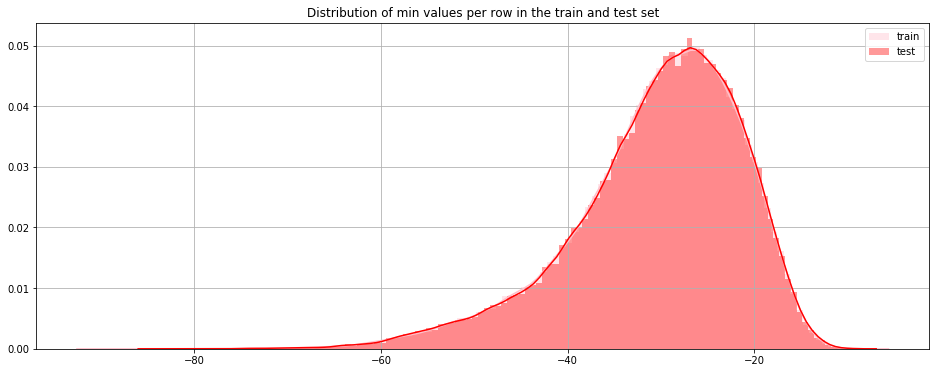

In [0]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_df[features].min(axis=1),color="pink", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

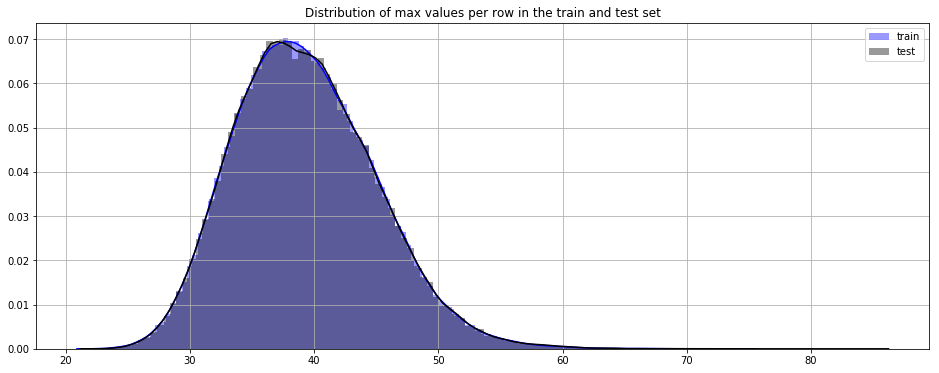

In [0]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train_df[feat].max(axis=1),color="b", kde=True,bins=120, label='train')
sns.distplot(test_df[feat].max(axis=1),color="black", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

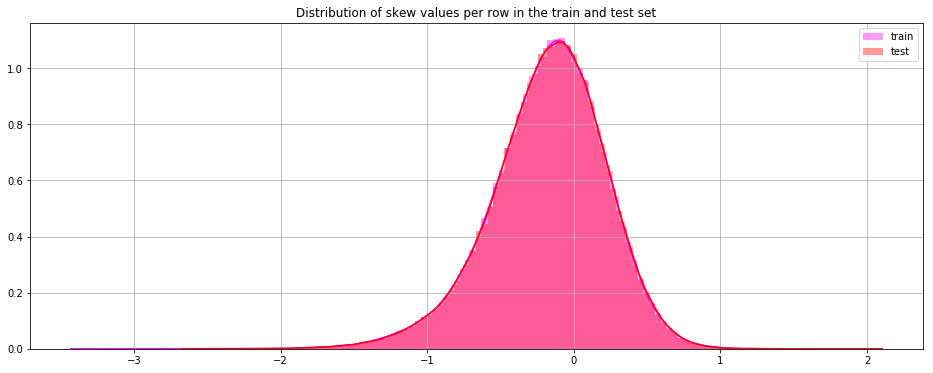

In [0]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per row in the train and test set")
sns.distplot(train_df[feat].skew(axis=1),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[feat].skew(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

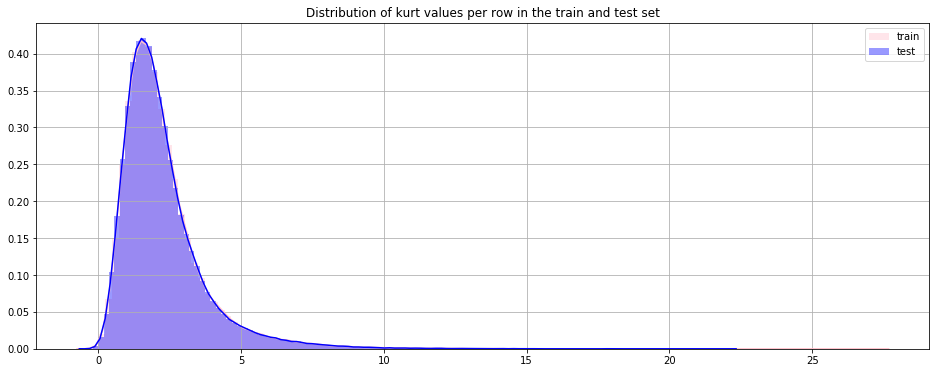

In [0]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurt values per row in the train and test set")
sns.distplot(train_df[feat].kurt(axis=1),color="pink", kde=True,bins=120, label='train')
sns.distplot(test_df[feat].kurt(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

*distribution is almost same for test and train data*

# visualization for adding some common features

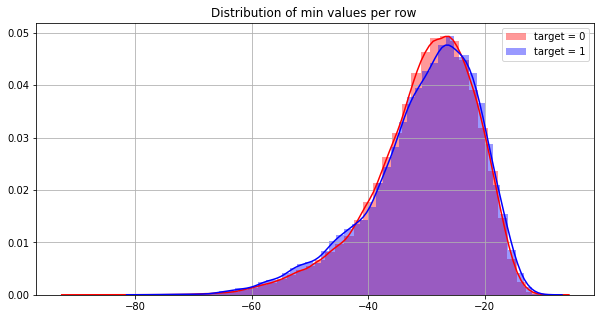

In [0]:
features =train_df.columns.values[2:202]
plt.figure(figsize=(10,5))
plt.title("Distribution of min values per row ")
sns.distplot(t0[features].min(axis=1),color="red", kde=True, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="blue", kde=True, label='target = 1')
plt.legend()
plt.grid()
plt.show()

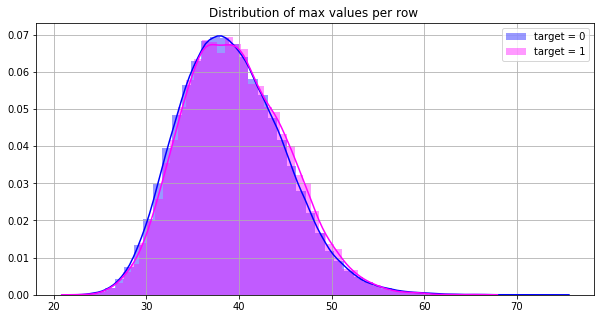

In [0]:
plt.figure(figsize=(10,5))
plt.title("Distribution of max values per row ")
sns.distplot(t0[features].max(axis=1),color="blue", kde=True, label='target = 0')
sns.distplot(t1[features].max(axis=1),color="magenta", kde=True, label='target = 1')
plt.legend()
plt.grid()
plt.show()

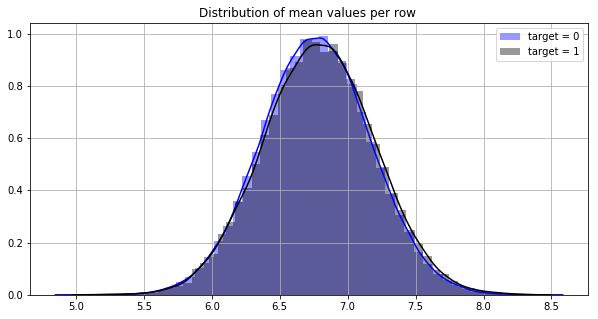

In [0]:
plt.figure(figsize=(10,5))
plt.title("Distribution of mean values per row ")
sns.distplot(t0[features].mean(axis=1),color="blue", kde=True, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="black", kde=True, label='target = 1')
plt.legend()
plt.grid()
plt.show()

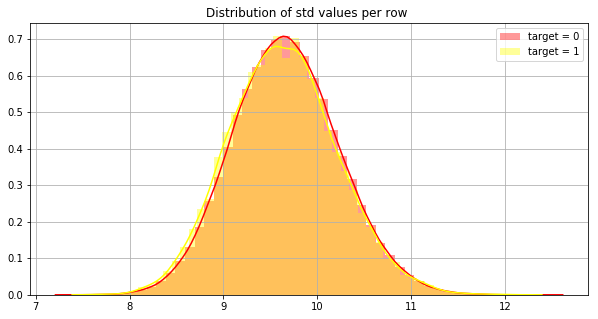

In [0]:
plt.figure(figsize=(10,5))
plt.title("Distribution of std values per row ")
sns.distplot(t0[features].std(axis=1),color="red", kde=True, label='target = 0')
sns.distplot(t1[features].std(axis=1),color="yellow", kde=True, label='target = 1')
plt.legend()
plt.grid()
plt.show()

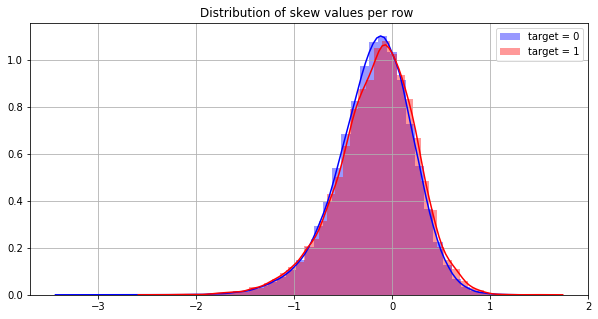

In [0]:
plt.figure(figsize=(10,5))
plt.title("Distribution of skew values per row ")
sns.distplot(t0[features].skew(axis=1),color="blue", kde=True, label='target = 0')
sns.distplot(t1[features].skew(axis=1),color="red", kde=True, label='target = 1')
plt.legend()
plt.grid()
plt.show()

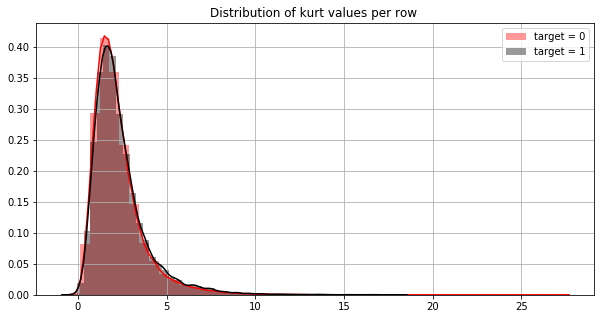

In [0]:
plt.figure(figsize=(10,5))
plt.title("Distribution of kurt values per row ")
sns.distplot(t0[features].kurt(axis=1),color="red", kde=True, label='target = 0')
sns.distplot(t1[features].kurt(axis=1),color="black", kde=True, label='target = 1')
plt.legend()
plt.grid()
plt.show()

train data for target 0 & target 1 has almost similar distribution for mean,max,min,median,kurt & skew.

# Feature engineering

In [0]:
#adding some common features
feat = train_df.columns.values[2:202]
for df in [test_df, train_df]:
    df['sum'] = df[feat].sum(axis=1)  
    df['min'] = df[feat].min(axis=1)
    df['max'] = df[feat].max(axis=1)
    df['mean'] = df[feat].mean(axis=1)
    df['std'] = df[feat].std(axis=1)
    df['skew'] = df[feat].skew(axis=1)
    df['kurt'] = df[feat].kurtosis(axis=1)
    df['med'] = df[feat].median(axis=1)

In [0]:
print(train_df.shape)
print(test_df.shape)

(200000, 210)
(200000, 209)


# preprocessing

In [0]:
feat = [col for col in train_df.columns if col not in ['ID_code', 'target']]
target = train_df['target']

In [0]:
x_test=test_df[feat]
x_train=train_df[feat]

In [0]:
#standarsiing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(200000, 208)
(200000, 208)


# GBDT

In [0]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 6.8MB/s 


In [0]:
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split

In [0]:
#parameter tuning
#https://scikit-optimize.github.io/#skopt.BayesSearchCV
X_train, X_val, y_train, y_val = train_test_split(x_train, target, train_size=0.80, random_state=0)
opt = BayesSearchCV(
    xgb.XGBClassifier(metric='auc'),
    {
        'max_depth': (8,10),
        'alpha':(0.1,0.2),
        'gamma':(0.3,0.4),
        'learning_rate': (0.04, 0.05),
    },n_jobs=-1, cv=2)

opt.fit(X_train, y_train)
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_val, y_val))
print("Best parameters: ", opt.best_params_)

it is taking lot of time more than 6 hrs on colab so tried gbdt without tuning hyperparameter

In [0]:
params = {'tree_method':'gpu_hist', 'max_depth':10, 'alpha':0.2,
          'gamma':0.4, 'subsample':0.5, 'scale_pos_weight':1, 'learning_rate': 0.05, 
          'silent': 1, 'objective':'binary:logistic', 'eval_metric': 'auc',
          'n_gpus': 1}

In [0]:
#https://xgboost.readthedocs.io/en/latest/parameter.html
%%time

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=1234)
rem_samp = np.zeros(len(train_df))
pred = np.zeros(len(test_df))



for i,(tr_idx, val_idx) in enumerate(skf.split(x_train,target.values)):
    print("\nFold {}".format(i))
    xgb_train = xgb.DMatrix(x_train[tr_idx],target[tr_idx])                          
                           
    xgb_val = xgb.DMatrix(x_train[val_idx],target[val_idx])
                                  
    clf = xgb.train(params, xgb_train,1000, evals=[(xgb_train, "train"), (xgb_val, "eval")],
                early_stopping_rounds=500, verbose_eval=False)
    
    rem_samp[val_idx] = clf.predict(xgb.DMatrix(x_train[val_idx])) 
    
    pred += clf.predict(xgb.DMatrix(x_test)) / 8

print("CV AUC: {}".format(roc_auc_score(target,rem_samp)))


Fold 0

Fold 1

Fold 2

Fold 3

Fold 4

Fold 5

Fold 6

Fold 7
CV AUC: 0.8820962643686727
CPU times: user 23min 25s, sys: 11min 21s, total: 34min 46s
Wall time: 32min 12s


# LGB

In [0]:
bay_tr_index, bay_val_index  = list(StratifiedKFold(n_splits=2, shuffle=True, random_state=1).split(x_train,target.values))[0]

In [0]:
#parameter tuning
#https://scikit-optimize.github.io/#skopt.BayesSearchCV
opt = BayesSearchCV(
    lgb.LGBMClassifier(objective='binary',metric='auc'),
    {
        'num_leaves':Integer(8,15),
        'bagging_fraction':Real(0.3,0.4),
        'feature_fraction':Real(0.3,0.4),
        'learning_rate': (0.01, 0.02),
        'min_data_in_leaf':(80,100),
    },n_jobs=-1, cv=2)

opt.fit(x_train[bay_tr_index],target[bay_tr_index])
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(x_train[bay_val_index],target[bay_val_index]))
print("Best parameters: ", opt.best_params_)

val. score: 0.89951
test score: 0.89951
Best parameters:  {'bagging_fraction': 0.3383218916236549, 'feature_fraction': 0.3621429919945276, 'learning_rate': 0.011462880850105828, 'min_data_in_leaf': 98, 'num_leaves': 9}


In [0]:
#setting the parameters
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.33,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.36,
    'learning_rate': 0.011,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf':98,
    'min_sum_hessian_in_leaf': 8.0,
    'num_leaves': 9,
    'num_threads':10,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1}

In [0]:
#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html#lightgbm.train
#https://www.kaggle.com/ashishpatel26/kfold-lightgbm/code 
#(learned from here how to use stratified k-fold with model)

skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=123456)
rem_samp= np.zeros(len(train_df))
pred = np.zeros(len(test_df))

feat_imp_df = pd.DataFrame()

for i,(tr_idx, val_idx) in enumerate(skf.split(x_train,target.values)):
    print("Fold {}".format(i))
    tr_data = lgb.Dataset(x_train[tr_idx], label=target.iloc[tr_idx])
    val_data = lgb.Dataset(x_train[val_idx], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, tr_data, num_round, valid_sets = [tr_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    
    rem_samp[val_idx] = clf.predict(x_train[val_idx], num_iteration=clf.best_iteration)
    
    fold_imp_df = pd.DataFrame()
    fold_imp_df["feature"] = feat
    fold_imp_df["importance"] = clf.feature_importance()
    fold_imp_df["fold"] = i + 1
    feat_imp_df = pd.concat([feat_imp_df,fold_imp_df], axis=0)
    
    
    pred+=clf.predict(x_test, num_iteration=clf.best_iteration) /skf.n_splits

print("CV score: {}".format(roc_auc_score(target,rem_samp)))

Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.949189	valid_1's auc: 0.887325
[2000]	training's auc: 0.975719	valid_1's auc: 0.880059
[3000]	training's auc: 0.990332	valid_1's auc: 0.876435
Early stopping, best iteration is:
[623]	training's auc: 0.934268	valid_1's auc: 0.889751
Fold 1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.948619	valid_1's auc: 0.889795
[2000]	training's auc: 0.975644	valid_1's auc: 0.882028
[3000]	training's auc: 0.990305	valid_1's auc: 0.878322
Early stopping, best iteration is:
[717]	training's auc: 0.938311	valid_1's auc: 0.891674
Fold 2
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.948994	valid_1's auc: 0.882525
[2000]	training's auc: 0.975836	valid_1's auc: 0.872997
[3000]	training's auc: 0.989994	valid_1's auc: 0.869132
Early stopping, best iteration is:
[714]	training's auc: 0.938448	valid_1's auc: 0.883551
Fold 3
Traini

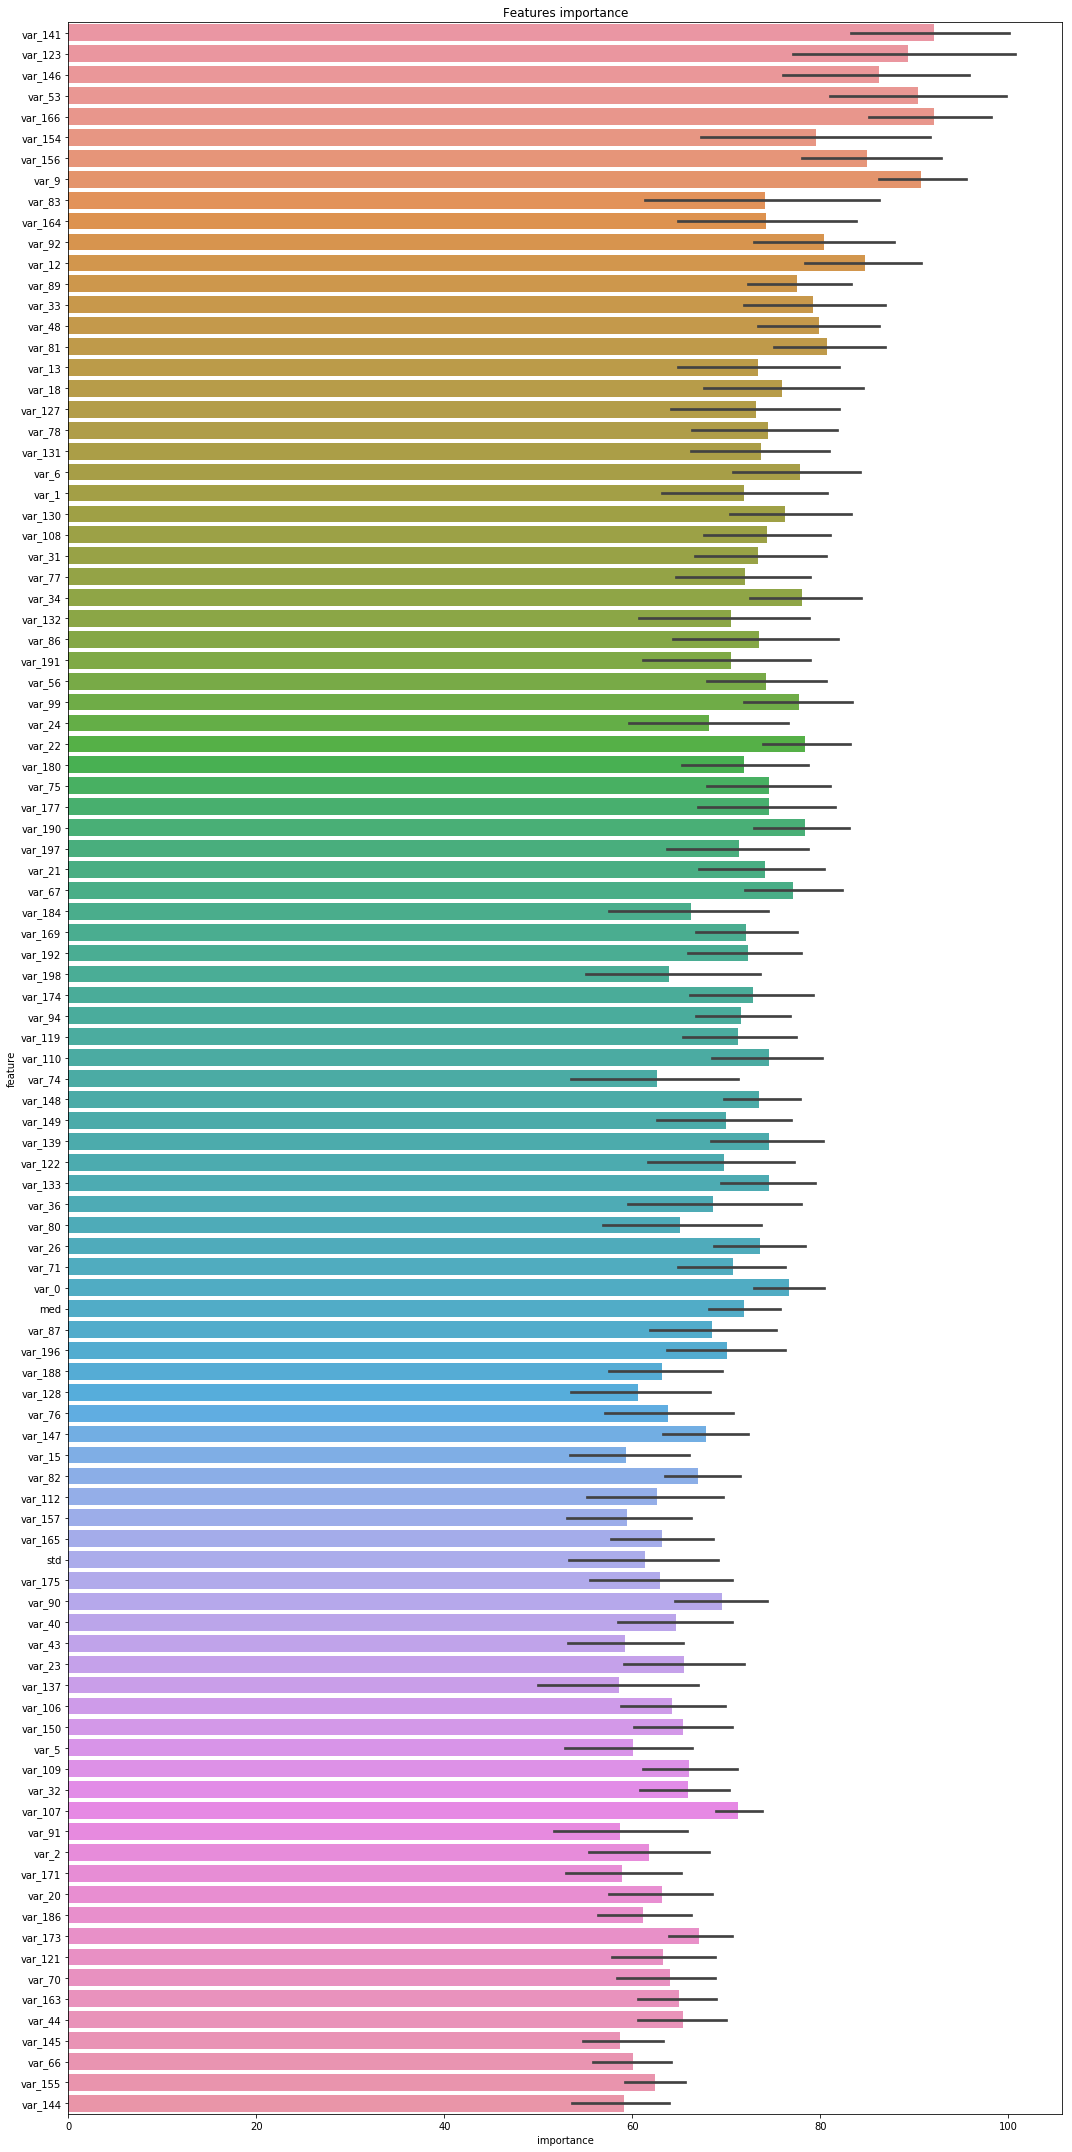

In [0]:
col= (feat_imp_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:100].index)
best_feat = feat_imp_df.loc[feat_imp_df.feature.isin(col)]

plt.figure(figsize=(15,30))
sns.barplot(x="importance", y="feature", data=best_feat.sort_values(by="importance",ascending=False))
plt.title('Features importance')
plt.tight_layout()

In [0]:
sub = pd.DataFrame({"ID_code":test_df["ID_code"].values})
sub["target"] = predictions
sub.to_csv("submission.csv", index=False)

In [0]:
sub=pd.read_csv('submission.csv')
sub.head(10)

,ID_code,target
0,test_0,0.098795
1,test_1,0.212387
2,test_2,0.226738
3,test_3,0.190676
4,test_4,0.037737
5,test_5,0.001349
6,test_6,0.004881
7,test_7,0.174774
8,test_8,0.001927
9,test_9,0.005255


# Conclusion

In [0]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "Train_AUC", "Test_AUC"]

x.add_row(["LGB", 0.89,0.90006])

print(x)

+-------+-----------+----------+
| Model | Train_AUC | Test_AUC |
+-------+-----------+----------+
|  LGB  |    0.89   | 0.90006  |
+-------+-----------+----------+


# Steps used-
1-Load the dataset.

2-Perform EDA to understand the data.

3-Do some preprocessing.

4-Try various models.

5-Report AUC.